### Student Details

Student name: Feiyang Li

Student ID: 23202564

In [ ]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

from plot_decision_boundary import plot_decision_boundary


# Task 1: Implement Logistic Regression

### Adaline class
From https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

In [ ]:
class AdalineGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

    def modified_predict(X):
        probas = model.predict_proba(X)
        return np.where(probas >= 0.5, 1, 0)


## Logistic regression
Adapt the Adaline class to use logistic regression. Recall, the `activation` function for logistic regression is the sigmoid function:

\begin{equation}
g\left(z\right) = \text{logit}^{-1}(z) = \frac{1}{1 + e^{-z}}
\end{equation}

where

\begin{equation}
z = \textbf{w} \cdot \textbf{x} = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n
\end{equation}

$z$ is given by the function `net_input` in the class.  Note: In Andrew Ng's videos, recall, he uses $\theta_i$ for the weights instead of $w_i$. And in some other videos, you may be see $\alpha$ used instead of $z$. This type of notation is not standardised, and the lack of standardised notation is something you will need to get used to in general.

The cost function is also updated to match the activation function:

\begin{equation}
\text{J}\left(\textbf{w}\right) = -\sum_i y^{(i)} \log\left(g(z^{(i)})\right) +
                                   \left(1 - y^{(i)}\right) \log\left(1 - g(z^{(i)}\right))
\end{equation}

where $g\left(z\right)$ is the `output` after the `net_input` and `activation` functions are called.

Then
1. Read the Iris-setosa and Iris-versicolor, sepal length and petal length
2. Train the algorithm
3. Plot the Logistic cost per epoch of training
4. Plot the decision boundary using the supplied plot_decision_boundary function

HINTS:
1. In the `AdalineGD` class, the `activation` function was not used in training, as it was the same as the `net_input` function. Now, they are different, and the `activation` function has to be called on the output of the `net_input` function during training.
2. The `predict` function needs to call the `net_input` function and the `activation` function in sequence.
3. The sigmoid function maps the full range of real numbers to the range 0 to 1. So the threshold in the predict function needs to be adapted. The output classes should also be changed to 0 and 1 instead of -1 and +1.
4. Use the `np.clip` function to clip the inputs to the `activation` function. E.g. clip $z$ to between -250 and +250. This stops very large numbers being input to the exponentiation function, which could lead to numerical instability.
5. Don't forget to rename the class, as we're now dealing with Logistic Regression rather than Adaline.

### Logistic Regression Class

<span style="color:red">Insert your code below</span>.

In [ ]:
################################
# Class stub for you to fill the rest of the code

class LogisticRegressionGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        # Clip data to avoid overflow
        z = np.clip(z, -250, 250)
        return 1.0 / (1.0 + np.exp(-z))

    def predict(self, X):
        # Classify labels based on the threshold at 0.5
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


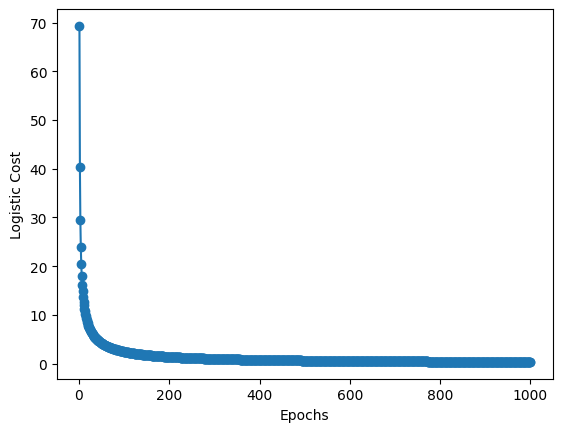

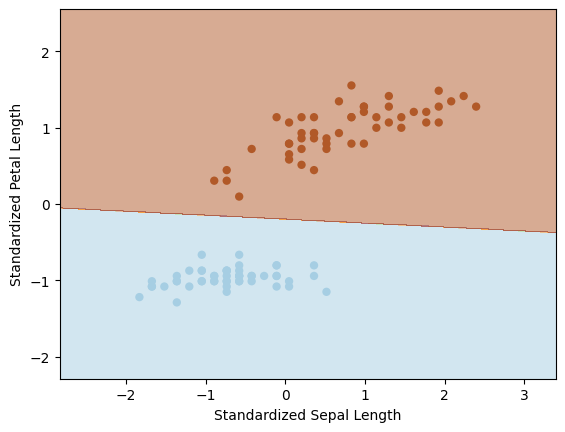

In [ ]:
# Load the dataset
iris = datasets.load_iris()
X = iris.data[:100, [0, 2]]  # Sepal length and petal length for Iris-setosa and Iris-versicolor
y = iris.target[:100]

# Standardize the features
sc = StandardScaler()
X_std = sc.fit_transform(X)

# Train the logistic regression model
lr = LogisticRegressionGD(eta=0.01, epochs=1000)
lr.train(X_std, y)

# Plot the logistic cost over epochs
plt.plot(range(1, len(lr.cost_) + 1), lr.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Logistic Cost')
plt.show()

# Plot decision boundary
plot_decision_boundary(X_std, y, lr)
plt.xlabel('Standardized Sepal Length')
plt.ylabel('Standardized Petal Length')
plt.show()


# Task 2: Multi-class Logistic Regression with scikit-learn

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Plot the scaled data
4. Train an instance of the scikitlearn LogisticRegression algorithm on the provided data
    1. You can use all the default parameters
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

Scikit-learn's LogisticRegression class has a parameter to control the regularisation. This parameter is C is the inverse of $\lambda$, which is described in the SVM videos. Note that the step above where the data is normalised is hugely important, as regularisation only works properly when data is normalised.
1. Plot the decision boundary above when you set C to smaller and larger values (even 0.01 and 100)
2. Describe what you observe with reference to what you know about regularisation from the material provided

<span style="color:red">Insert your code below</span>.

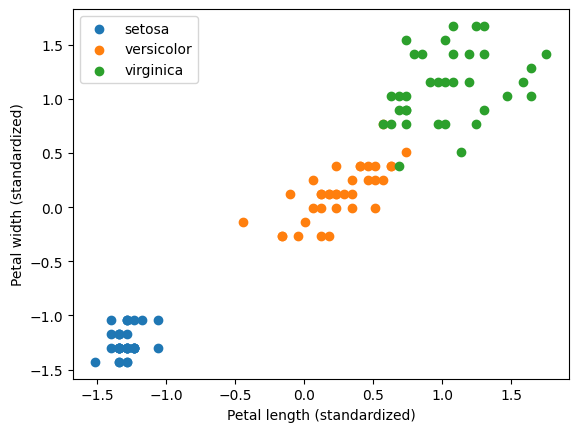

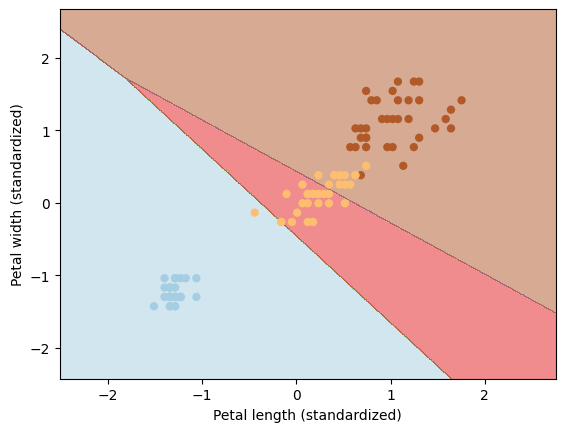

Accuracy: 75.56%


In [ ]:
# 1. Load the data
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # Petal length and width
y = iris.target  # Class labels are already 0,1,2

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 3. Standardize the data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Plot the standardized data
plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], label='setosa')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], label='versicolor')
plt.scatter(X_train_std[y_train==2, 0], X_train_std[y_train==2, 1], label='virginica')
plt.xlabel('Petal length (standardized)')
plt.ylabel('Petal width (standardized)')
plt.legend()
plt.show()
print()

# 4. Train the logistic regression model
lr = LogisticRegression(C=0.01)
lr.fit(X_train_std, y_train)

# 5. Plot the decision boundary
plot_decision_boundary(X_train_std, y_train, lr)
plt.xlabel('Petal length (standardized)')
plt.ylabel('Petal width (standardized)')
# plt.legend()
plt.show()

# 6. Compute accuracy
y_pred = lr.predict(X_test_std)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))


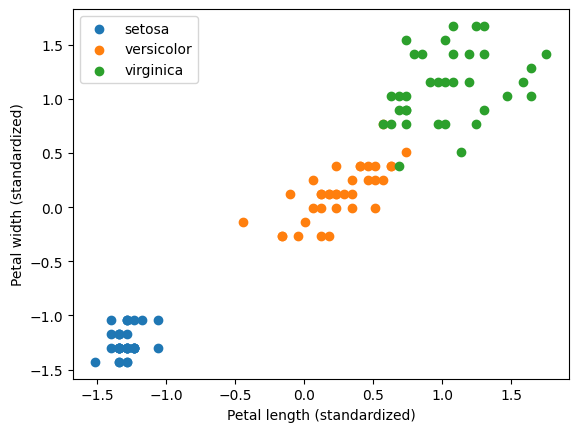

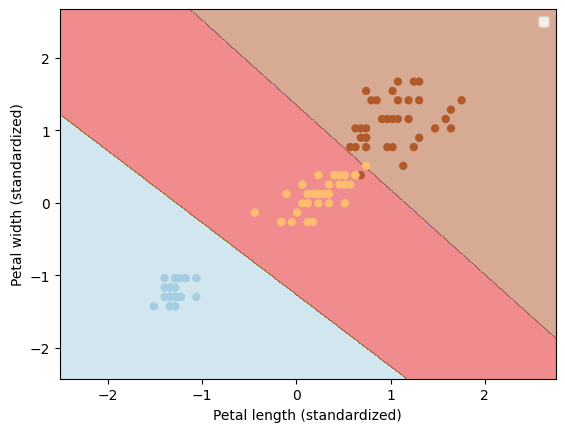

Accuracy: 93.33%


In [ ]:
# 1. Load the data
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # Petal length and width
y = iris.target  # Class labels are already 0,1,2

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 3. Standardize the data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Plot the standardized data
plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], label='setosa')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], label='versicolor')
plt.scatter(X_train_std[y_train==2, 0], X_train_std[y_train==2, 1], label='virginica')
plt.xlabel('Petal length (standardized)')
plt.ylabel('Petal width (standardized)')
plt.legend()
plt.show()

# 4. Train the logistic regression model
lr = LogisticRegression(C=100)
lr.fit(X_train_std, y_train)

# 5. Plot the decision boundary
plot_decision_boundary(X_train_std, y_train, lr)
plt.xlabel('Petal length (standardized)')
plt.ylabel('Petal width (standardized)')
plt.legend()
plt.show()

# 6. Compute accuracy
y_pred = lr.predict(X_test_std)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))


When we use a smaller value of C, we get a broader decision boundary that covers more data points. This is because the model is constrained by stronger regularisation and thus favours simpler solutions.  
  
With larger values of C, the decision boundary may be more complex, better distinguishing between different data classes. This is because the model is subject to less regularisation constraints and thus adapts more to the training data.

# Task 3: Multi-class Linear SVM

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Print the scaled data
4. Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data
    1. You can use all the default parameters, except set the kernel to linear
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

<span style="color:red">Insert your code below</span>.

Standardized training data:
 [[-0.4419858  -0.13661044]
 [ 0.40282929  0.38029394]
 [-1.2868009  -1.17041921]
 [ 1.19132338  1.41410271]
 [ 0.17754527  0.12184175]
 [ 0.79707634  1.41410271]
 [-1.2868009  -1.4288714 ]
 [-1.23047989 -1.29964531]
 [-1.3431219  -1.29964531]
 [ 1.19132338  1.15565051]
 [ 0.74075533  1.02642442]
 [-1.3431219  -1.29964531]
 [-1.23047989 -1.29964531]
 [ 0.40282929  0.38029394]
 [ 0.00858225 -0.13661044]
 [ 1.24764439  0.76797223]
 [-1.23047989 -1.04119311]
 [-1.23047989 -1.29964531]
 [ 1.07868137  1.6725549 ]
 [ 0.57179231  0.76797223]
 [-1.2868009  -1.04119311]
 [ 0.62811332  0.76797223]
 [ 1.58557043  1.15565051]
 [ 1.64189143  1.02642442]
 [ 0.23386627 -0.00738435]
 [-1.3431219  -1.17041921]
 [-1.2868009  -1.04119311]
 [-1.39944291 -1.04119311]
 [ 0.62811332  0.38029394]
 [ 0.12122426  0.12184175]
 [-1.2868009  -1.04119311]
 [-1.3431219  -1.17041921]
 [ 0.17754527 -0.26583654]
 [-0.10405976  0.12184175]
 [-1.3431219  -1.4288714 ]
 [-1.3431219  -1.17041921]

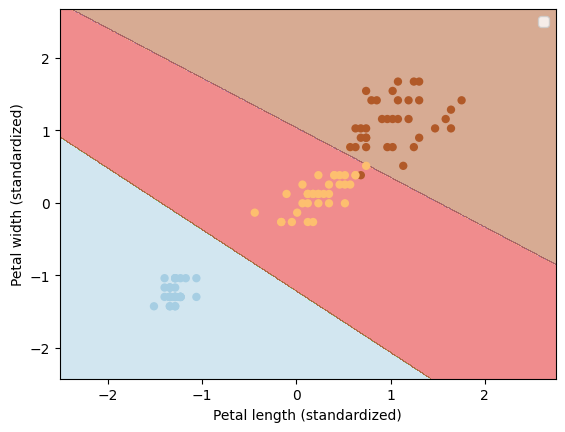

Accuracy: 91.11%


In [ ]:
# 1. Load data
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # Petal length and width
y = iris.target  # Class labels

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 3. Standardize the data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
# Print the standardized data
print("Standardized training data:\n", X_train_std)
print("Standardized test data:\n", X_test_std)

# 4. Train the SVM model
svm = SVC(kernel='linear')
svm.fit(X_train_std, y_train)

# 5. Plot the decision boundary
plot_decision_boundary(X_train_std, y_train, svm)
plt.xlabel('Petal length (standardized)')
plt.ylabel('Petal width (standardized)')
plt.legend()
plt.show()

# 6. Calculate the accuracy
y_pred = svm.predict(X_test_std)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))


# Task 4: Kernel SVM and nonlinear problems

You are provided with a randomised dataset that is clearly not linearly separable, and obviously we could not separate the examples from the two classes very well using any of the linear methods - Perceptron, logistic regression or linear SVM (without kernels).

1. Run an RBF (radial basis function, or Gaussian) kernel SVM model on the data
2. Plot the decision boundaries using the provided function (choose a soft gamma value of 0.1)
3. Change the gamma value to 100. What happens? What is the problem with this result?

Then:
* Repeat for the multi-class Iris data, to provide a multi-class, nonlinear solution

Note: the gamma parameter is related to the standard deviation of the Gaussian kernel, i.e. $\gamma = \frac{1}{2\sigma^2}$, or the similarity function

\begin{equation}
\text{similarity}(x, l^{(i)}) = \exp\left(-\gamma||x - l^{(i)}||^2\right) = \exp\left(\frac{||x - l^{(i)}||^2}{2\sigma^2}\right)
\end{equation}

### Provided generated data

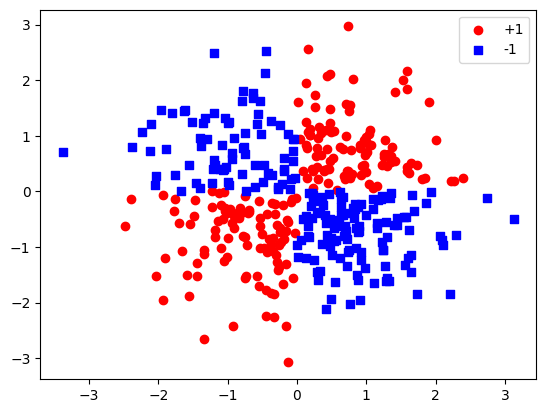

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X_r = np.random.randn(400,2)
y_r = np.where([x[0]*x[1] > 0 for x in X_r], 1, -1)

plt.scatter(X_r[y_r==1, 0],X_r[y_r==1, 1],c='r',marker='o',label='+1')
plt.scatter(X_r[y_r==-1, 0],X_r[y_r==-1, 1],c='b',marker='s',label='-1')
plt.legend()
plt.show()

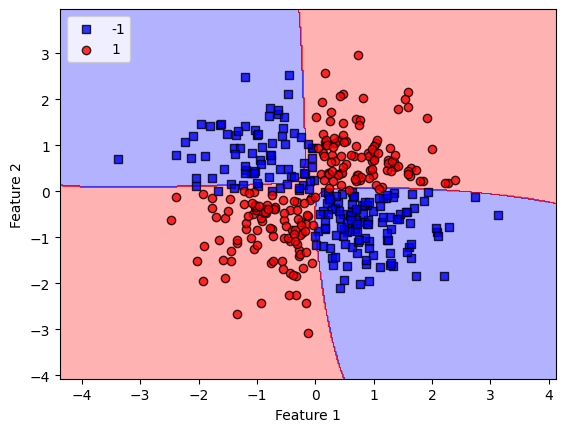

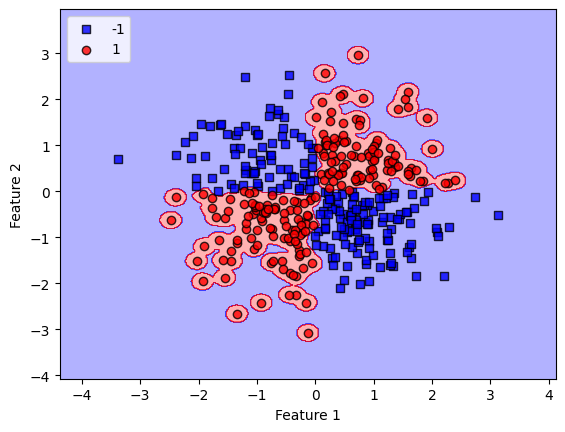

In [ ]:
# SVM training model using RBF kernel
svm_rbf = SVC(kernel='rbf', gamma=0.1)
svm_rbf.fit(X_r, y_r)

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'o', 'x', '^', 'v')
    colors = ('blue', 'red', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

# Mapping of decision-making boundaries when gamma=0.1
plot_decision_regions(X_r, y_r, classifier=svm_rbf)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.show()

# Change the gamma value to 100 and plot the decision boundary
svm_rbf_high_gamma = SVC(kernel='rbf', gamma=100)
svm_rbf_high_gamma.fit(X_r, y_r)
plot_decision_regions(X_r, y_r, classifier=svm_rbf_high_gamma)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.show()

When the gamma value is changed to 100, the decision boundary becomes more complex, with many bends and sharp turns possible.
  
The problem that arises is that the model is overfitted, which can lead to performance degradation. It is also possible to increase the computational cost of model training and prediction.